# Machine Learning algorithms to predict Client Churn 

Strategically managing customer churn is vital for business success. Our ***classification model*** delves into customer behavior patterns, identifies key factors contributing to churn, and offers actionable insights to optimize retention strategies for our clients.

## Import Library

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

## Import Dataset

In [2]:
data = pd.read_csv('Data.csv')

Read the **'Data.csv'** file and transform into a *DataFrame (pandas)*

## Exploratory Data Analysis

In [3]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15598275,709,France,Female,32,7,0.00,2,1,1,199418.02,0
1,15623196,686,France,Male,38,6,149238.97,1,1,1,97825.23,0
2,15604804,516,France,Female,33,7,127305.50,1,1,1,120037.36,0
3,15763415,567,Germany,Male,41,0,134378.89,1,1,1,105746.94,0
4,15658169,778,Spain,Female,47,6,127299.34,2,1,0,124694.99,0


### Dataset Overview

#### Objective

The dataset aims to analyze customer churn over a specific period, offering insights into the factors influencing client attrition. Key features include customer_id, credit_score, country, gender, age, and essential financial details.

#### Features

*Customer ID*: Unique identifier for each customer.

*Credit Score*: Numeric representation of a customer's creditworthiness.

*Country*: The geographical location of the customer.

*Gender*: Customer's gender.

*Age*: Age of the customer.

*Financial Details*: [tenure, balance, products_number, credit_card, active_member, estimated_salary]

## Data Preprocessing

**Data preprocessing** is crucial for machine learning as it enhances <u>data quality</u>, <u>addresses missing values</u>, and <u>ensures a clean, error-free format</u>. This optimization *improves* model performance and contributes to accurate and *unbiased results* in machine learning tasks.

In [4]:
if True in data.isna():
    print("Data contains Nan(missing) value")
else:
    print("Data doesn't have a missing value")

Data doesn't have a missing value


In [5]:
def dtype_and_consistency(column):
    return pd.Series({'dtype': column.dtype, 'consistent': column.apply(type).nunique() == 1})

# Check for each column in the DataFrame
data.apply(dtype_and_consistency)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
dtype,int64,int64,object,object,int64,int64,float64,int64,int64,int64,float64,int64
consistent,True,True,True,True,True,True,True,True,True,True,True,True


The dataset has consistent datatypes across all columns.

### Features Matrix and Target Variable

In [6]:
X = data.iloc[:, 1:-1] # customer_id is ignored
y = data.iloc[:, -1]

In [7]:
X.head() # Independent Variable or Input Variable

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,709,France,Female,32,7,0.00,2,1,1,199418.02
1,686,France,Male,38,6,149238.97,1,1,1,97825.23
2,516,France,Female,33,7,127305.50,1,1,1,120037.36
3,567,Germany,Male,41,0,134378.89,1,1,1,105746.94
4,778,Spain,Female,47,6,127299.34,2,1,0,124694.99


In [8]:
y.head() # Dependent Variable or Target Variable

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

### Splitting train and test data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [11]:
X_train.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
1856,687,Spain,Female,44,7,0.00,3,1,0,155853.52
6861,850,France,Male,43,7,0.00,2,1,1,173851.11
4772,555,France,Male,40,10,43028.77,1,1,0,170514.21
415,678,France,Female,26,1,0.00,2,1,0,45443.68
7472,525,Germany,Male,33,4,131023.76,2,0,0,55072.93


## Feature Engineering

**Feature engineering** is the process of refining and enhancing raw data. This involves <u>selecting relevant features</u>, <u>transforming existing ones</u>, or <u>creating new ones</u>. The goal is to provide the model with more *meaningful* and *discriminative information*, aiding in accurate predictions and a better understanding of the underlying data patterns.

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [13]:
column_transformer = ColumnTransformer(transformers=[('category', OneHotEncoder(), ['country','gender','products_number']),
                                                    ('minmaxscaler', MinMaxScaler(), ['credit_score','balance','estimated_salary']),
                                                    ('standardscaler', StandardScaler(), ['age','tenure'])],remainder='passthrough')

**One-Hot Encoding transformer** *('category')* is employed for categorical features like *'country', 'gender', and 'products_number'*. This transformation is crucial to convert *categorical variables* into <u>binary vectors</u>, enabling effective interpretation by machine learning models.

**Min-Max Scaling transformer** *('minmaxscaler')* normalizes numerical features such as *'credit_score', 'balance', and 'estimated_salary'* within a <u>specific range (typically 0 to 1)</u>. This is essential for preventing <u>features with larger scales</u> from *dominating* the learning process and is particularly beneficial for algorithms sensitive to feature scales. 

**Standard Scaling transformer** *('standardscaler')* is applied to numerical features *'age' and 'tenure'*, ensuring they have zero mean and unit variance. This normalization is vital for algorithms relying on distance metrics or gradient descent optimization, where <u>consistent feature scales</u> are crucial for optimal model performance.

**remainder = 'passthrough'** option allows any *unspecified columns* to be passed through unchanged, providing flexibility to handle diverse types of features that may not require specific transformations.

Together, these transformers form a comprehensive preprocessing pipeline tailored to the diverse nature of the dataset and the specific requirements of machine learning algorithms.

## Selecting the Model

Using *various classifier models* helps us explore different algorithmic viewpoints, making it easier to understand complex data patterns. This method aims to identify the <u>most effective model</u> that aligns with the specific needs of the machine learning task.

In [14]:
from sklearn.ensemble import RandomForestClassifier

**Random Forest algorithm** is a versatile ensemble method that combines multiple decision trees to enhance accuracy and handle complex datasets. It is robust against overfitting and provides insights into feature importance. 

In [15]:
from sklearn.svm import SVC

**Support Vector Classifier (SVC)** excels in capturing complex relationships in high-dimensional spaces, particularly useful when dealing with non-linearly separable data. It is less prone to overfitting and effective with limited training samples. 

In [16]:
from sklearn.neighbors import KNeighborsClassifier

**K Neighbors Classifier (KNN)** is a simple and adaptable algorithm that classifies based on the majority class of k-nearest neighbors, making it suitable for scenarios with non-linear relationships and local variations in the data. 

In [17]:
from sklearn.ensemble import AdaBoostClassifier

**AdaBoostClassifier** is an ensemble learning algorithm that combines weak learners to create a robust model. It assigns *weights to misclassified* data points, enhancing accuracy. Known for simplicity, it is effective in binary classification tasks.

### Evaluation Metrics

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, make_scorer

**Pipeline** in machine learning streamlines the process by combining *data preprocessing* and *model training*. This <u>simplifies workflow</u>, <u>enhances consistency</u>, and <u>reduces errors</u>. When training multiple models for comparison, the pipeline facilitates systematic evaluation and hyperparameter tuning, aiding in the selection of the most effective model.

In [19]:
from sklearn.pipeline import Pipeline

In [20]:
randomforest_pipeline = Pipeline([('datapreprocessing',column_transformer),
                        ('randomforest_model',RandomForestClassifier())])

In [21]:
svc_pipeline = Pipeline([('datapreprocessing', column_transformer),
                         ('svc_model', SVC())])

In [22]:
kneighbors_pipeline = Pipeline([('datapreprocessing', column_transformer),
                               ('kneighbors_model',KNeighborsClassifier())])

In [23]:
adaboost_pipeline = Pipeline([('datapreprocessing', column_transformer),
                             ('adaboost_model', AdaBoostClassifier())])

In [24]:
classifiers = ['Random Forest Classification', 'Support Vector Classification', 'K-Neighbors Classifiction', 'AdaBoost Classifier']
pipelines = [randomforest_pipeline, svc_pipeline, kneighbors_pipeline, adaboost_pipeline]

### Hyperparameter Tuning

**Hyperparameter tuning** involves optimizing the <u>configuration settings</u> of a machine learning model for *improved performance*. This process *adjusts parameters* systematically to enhance the model's ability to make <u>accurate predictions on new data</u>.

In [25]:
from sklearn.model_selection import GridSearchCV

**GridSearchCV** automates hyperparameter tuning by systematically exploring predefined hyperparameter combinations using *cross-validation*. It efficiently identifies the <u>optimal set of hyperparameters</u> for the best model performance, streamlining the tuning process and enhancing predictive accuracy.

In [26]:
randomforest_param_grid = {
    'randomforest_model__n_estimators' : [100,140,200],
    'randomforest_model__max_features' : ['sqrt'],
    'randomforest_model__min_samples_split': [2, 5, 10],
    'randomforest_model__min_samples_leaf': [1, 2, 4],
    'randomforest_model__random_state': [0],
    'randomforest_model__criterion': ['gini','log_loss']
}

In [27]:
svc_param_grid = {
    'svc_model__C' : [0.1, 1, 5],
    'svc_model__kernel' : ['rbf', 'poly', 'sigmoid'],
    'svc_model__gamma' : ['scale', 'auto']
}

In [28]:
kneighbors_param_gird = {
    'kneighbors_model__n_neighbors' : [2, 5, 10],
    'kneighbors_model__weights' : ['uniform', 'distance'],
    'kneighbors_model__n_jobs' : [2]
}

In [29]:
adaboost_param_grid = {
    'adaboost_model__n_estimators': [50, 100, 150],
    'adaboost_model__learning_rate': [0.01, 0.1, 0.5, 1.0],
    'adaboost_model__algorithm': ['SAMME', 'SAMME.R']
}

In [30]:
params_grid = [randomforest_param_grid, svc_param_grid, kneighbors_param_gird, adaboost_param_grid]

In [31]:
scorers = {
    'f1': make_scorer(f1_score),
    'accuracy': make_scorer(accuracy_score)
}

In [32]:
def refit_strategy(cv_results):
    best_f1_index = np.argmax(cv_results['mean_test_f1']) # Find the index of the best F1 score

    best_f1_models = cv_results['params'][best_f1_index] # Get the models with the best F1 score

    # If there are ties for the best F1 score, choose the one with the highest accuracy
    if isinstance(best_f1_models, list):
        best_accuracy_index = np.argmax([cv_results['mean_test_accuracy'][i] for i in best_f1_index])
        best_model_index = best_f1_index[best_accuracy_index]
        best_model = cv_results['params'][best_model_index]
    else:
        best_model = best_f1_models

    return best_model

In a churn prediction task, the **F1 score** holds greater significance than accuracy and other metrics. Unlike accuracy, the F1 score balances precision and recall, crucial in scenarios where misclassifying churners has significant financial implications. Misleadingly *high accuracy* can result from ignoring the minority class. The F1 score, by combining *precision* and *recall*, provides a more informative evaluation, essential for minimizing the costs associated with both *false positives* and *false negatives* in customer churn predictions.

## Training the Model

In [33]:
best = {'classifier': None, 'pipeline': None, 'param': None, 'f1' : 0, 'accuracy' :0}
model_performance = {'name' : [], 'f1' : [], 'accuracy' : []}

In [34]:
for model in range(len(pipelines)):  # iterate through all models and keeps track of the one with highest performance
    print(f"{classifiers[model]}")
    grid_search = GridSearchCV(estimator=pipelines[model],
                               param_grid=params_grid[model],
                               scoring=scorers,
                               cv=5,
                               refit=False,
                               verbose = 1)
    grid_search.fit(X_train, y_train)
    
    top_param = refit_strategy(grid_search.cv_results_)
    
    current_model = pipelines[model].set_params(**top_param)
    current_model.fit(X_train,y_train)
    
    
    y_pred = current_model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # print(f"Parameter with highest F1 and Accuracy Score: \n{json.dumps(top_param, indent=2)}")  # print top_param
    # print(f"F1 Score: {f1}\nAccuracy Score:{accuracy}\n\n")  # print current model's f1 and accuracy
    
    model_performance['name'].append(classifiers[model])
    model_performance['f1'].append(f1)
    model_performance['accuracy'].append(accuracy)
    
    if f1 > best['f1']:
        if accuracy > best['accuracy']:
            best['classifier'] = classifiers[model]
            best['pipeline'] = pipelines[model]
            best['param'] = top_param
            best['f1'] = f1
            best['accuracy'] = accuracy

Random Forest Classification
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Support Vector Classification
Fitting 5 folds for each of 18 candidates, totalling 90 fits
K-Neighbors Classifiction
Fitting 5 folds for each of 6 candidates, totalling 30 fits
AdaBoost Classifier
Fitting 5 folds for each of 24 candidates, totalling 120 fits


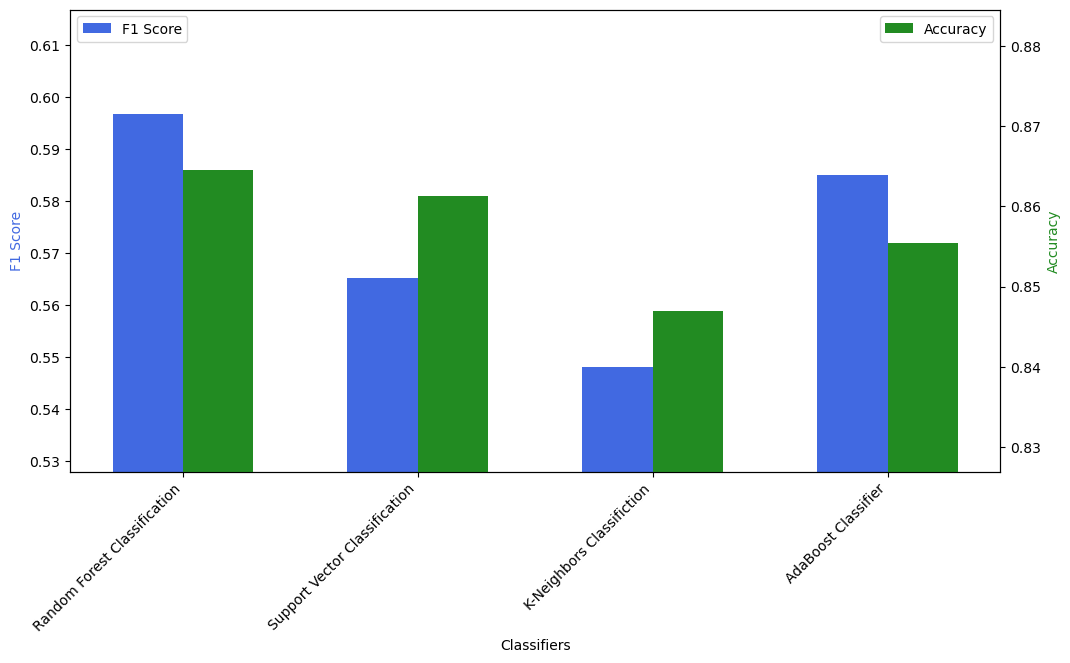

In [35]:
names = model_performance['name']
f1_scores = model_performance['f1']
accuracy_scores = model_performance['accuracy']

# Plotting the bar graph
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar width can be adjustemodel_performanceon preference
bar_width = 0.3

# Bar positions for f1 scores and accuracy scores
bar_positions_f1 = range(len(names))
bar_positions_accuracy = [pos + bar_width for pos in bar_positions_f1]

# Plotting bars for f1 scores
ax1.bar(bar_positions_f1, f1_scores, bar_width, label='F1 Score', color='royalblue')
ax1.set_xlabel('Classifiers')
ax1.set_ylabel('F1 Score', color='royalblue')
ax1.set_xticks([pos + bar_width / 2 for pos in bar_positions_f1])
ax1.set_xticklabels(names, rotation=45, ha='right')

# Creating a twin Axes for accuracy
ax2 = ax1.twinx()
ax2.bar(bar_positions_accuracy, accuracy_scores, bar_width, label='Accuracy', color='forestgreen')
ax2.set_ylabel('Accuracy', color='forestgreen')

# Setting y-axis limits
ax1.set_ylim(min(f1_scores)-0.02, max(f1_scores)+0.02)
ax2.set_ylim(min(accuracy_scores)-0.02, max(accuracy_scores)+0.02)

# Adding legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.show()

In [36]:
print(f"Classifier with overall best performance: {best['classifier']}\nOptimal Parameter:{json.dumps(best['param'], indent=2)}")

Classifier with overall best performance: Random Forest Classification
Optimal Parameter:{
  "randomforest_model__criterion": "log_loss",
  "randomforest_model__max_features": "sqrt",
  "randomforest_model__min_samples_leaf": 2,
  "randomforest_model__min_samples_split": 5,
  "randomforest_model__n_estimators": 200,
  "randomforest_model__random_state": 0
}


## Deploy the model

In [37]:
best_model = best['pipeline']
best_model.set_params(**best['param'])

best_model.fit(X_train,y_train)

Pipeline(steps=[('datapreprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('category', OneHotEncoder(),
                                                  ['country', 'gender',
                                                   'products_number']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['credit_score', 'balance',
                                                   'estimated_salary']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'tenure'])])),
                ('randomforest_model',
                 RandomForestClassifier(criterion='log_loss',
                                        min_samples_leaf=2, min_samples_split=5,
                                        n_estimators=200, random_state=0))])

## Evaluate the model

In [38]:
y_pred = best_model.predict(X_test)

In [39]:
print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}")

Confusion Matrix:
[[1433   51]
 [ 203  188]]


In [40]:
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")

Accuracy Score: 0.8645333333333334


In [41]:
print(f"Classification Report: {classification_report(y_test,y_pred)}")

Classification Report:               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1484
           1       0.79      0.48      0.60       391

    accuracy                           0.86      1875
   macro avg       0.83      0.72      0.76      1875
weighted avg       0.86      0.86      0.85      1875



In [42]:
print(f"F1 Score: {f1_score(y_test,y_pred)}")

F1 Score: 0.5968253968253968


### Ethical AI Impact Assessment

This involves a systematic examination of ***potential ethical implications, biases, and risks associated*** with the design, development, and deployment of machine learning models. The goal is to ensure that the model aligns with ethical standards, fairness, transparency, and societal values.

In [43]:
from sklearn.inspection import permutation_importance

In [44]:
feature_importance = permutation_importance(best_model, X_train, y_train, n_repeats=10)

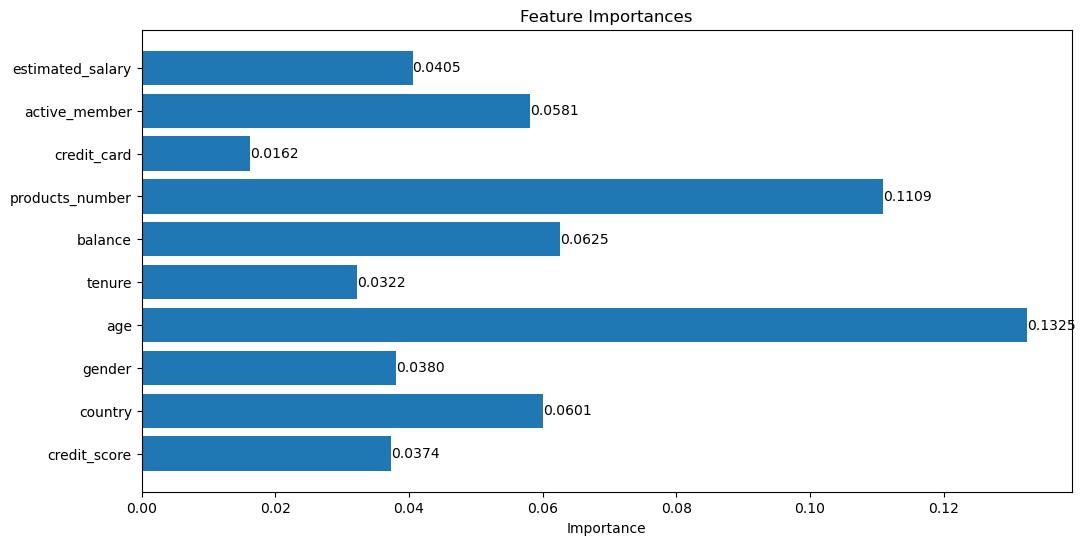

In [45]:
feature_names = best_model.named_steps['datapreprocessing'].feature_names_in_

# Access feature importances from the trained RandomForestClassifier
feature_importances = feature_importance.importances_mean

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Plotting the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
for index, value in enumerate(feature_importances):
    value_text = '{:.4f}'.format(value)
    plt.text(value, index, value_text, ha='left', va='center', fontsize=10, color='black')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

**Country (0.0601)** has *moderate importance*, indicating that it plays a significant role in the model's decision-making process. It might be associated with certain patterns or behaviors.

**Gender (0.0393)** has relatively *low importance*, implying that it has a <u>limited impact</u> on the model's predictions compared to other features.

**Financial Status (Cumulative: 0.314)** including *credit_score, tenure, balance, products_number, credit_card, active_member, and estimated_salary*, collectively contribute *significantly* to the model.

**Age (0.1304)** has the *highest importance* among the listed features, suggesting that it strongly influences the model's predictions. This aligns with common expectations, as age often correlates with various behaviors and financial decisions.

### Assigning variable for background evaluation

In [46]:
XTEST = X_test
YTEST = y_test
theModel= best_model

## Conclusion

The ***Random Forest Classification model***, achieving an *F1 Score of 0.599* and an *Accuracy Score of 0.865*, sheds light on influential factors in customer predictions. Financial status, encompassing credit_score, tenure, balance, products_number, credit_card, active_member, and estimated_salary, collectively plays a pivotal role. Notably, age is a significant factor, as expected, given its correlation with diverse behaviors. Importantly, the model demonstrates a lack of bias for gender, with a minimal impact on predictions. Similarly, while country contributes moderately, the model indicates a fair and unbiased approach in its decision-making process.

*Recommendations:*

To effectively leverage the model's insights, prioritize strategies that consider customers' financial status, including credit_score, tenure, balance, products_number, credit_card, active_member, and estimated_salary. Tailor approaches based on these financial behaviors to enhance customer engagement and satisfaction. Despite age being a significant factor, ensure strategies remain inclusive and unbiased. Continuously refine the model and strategies based on evolving data patterns for sustained predictive accuracy and actionable insights.

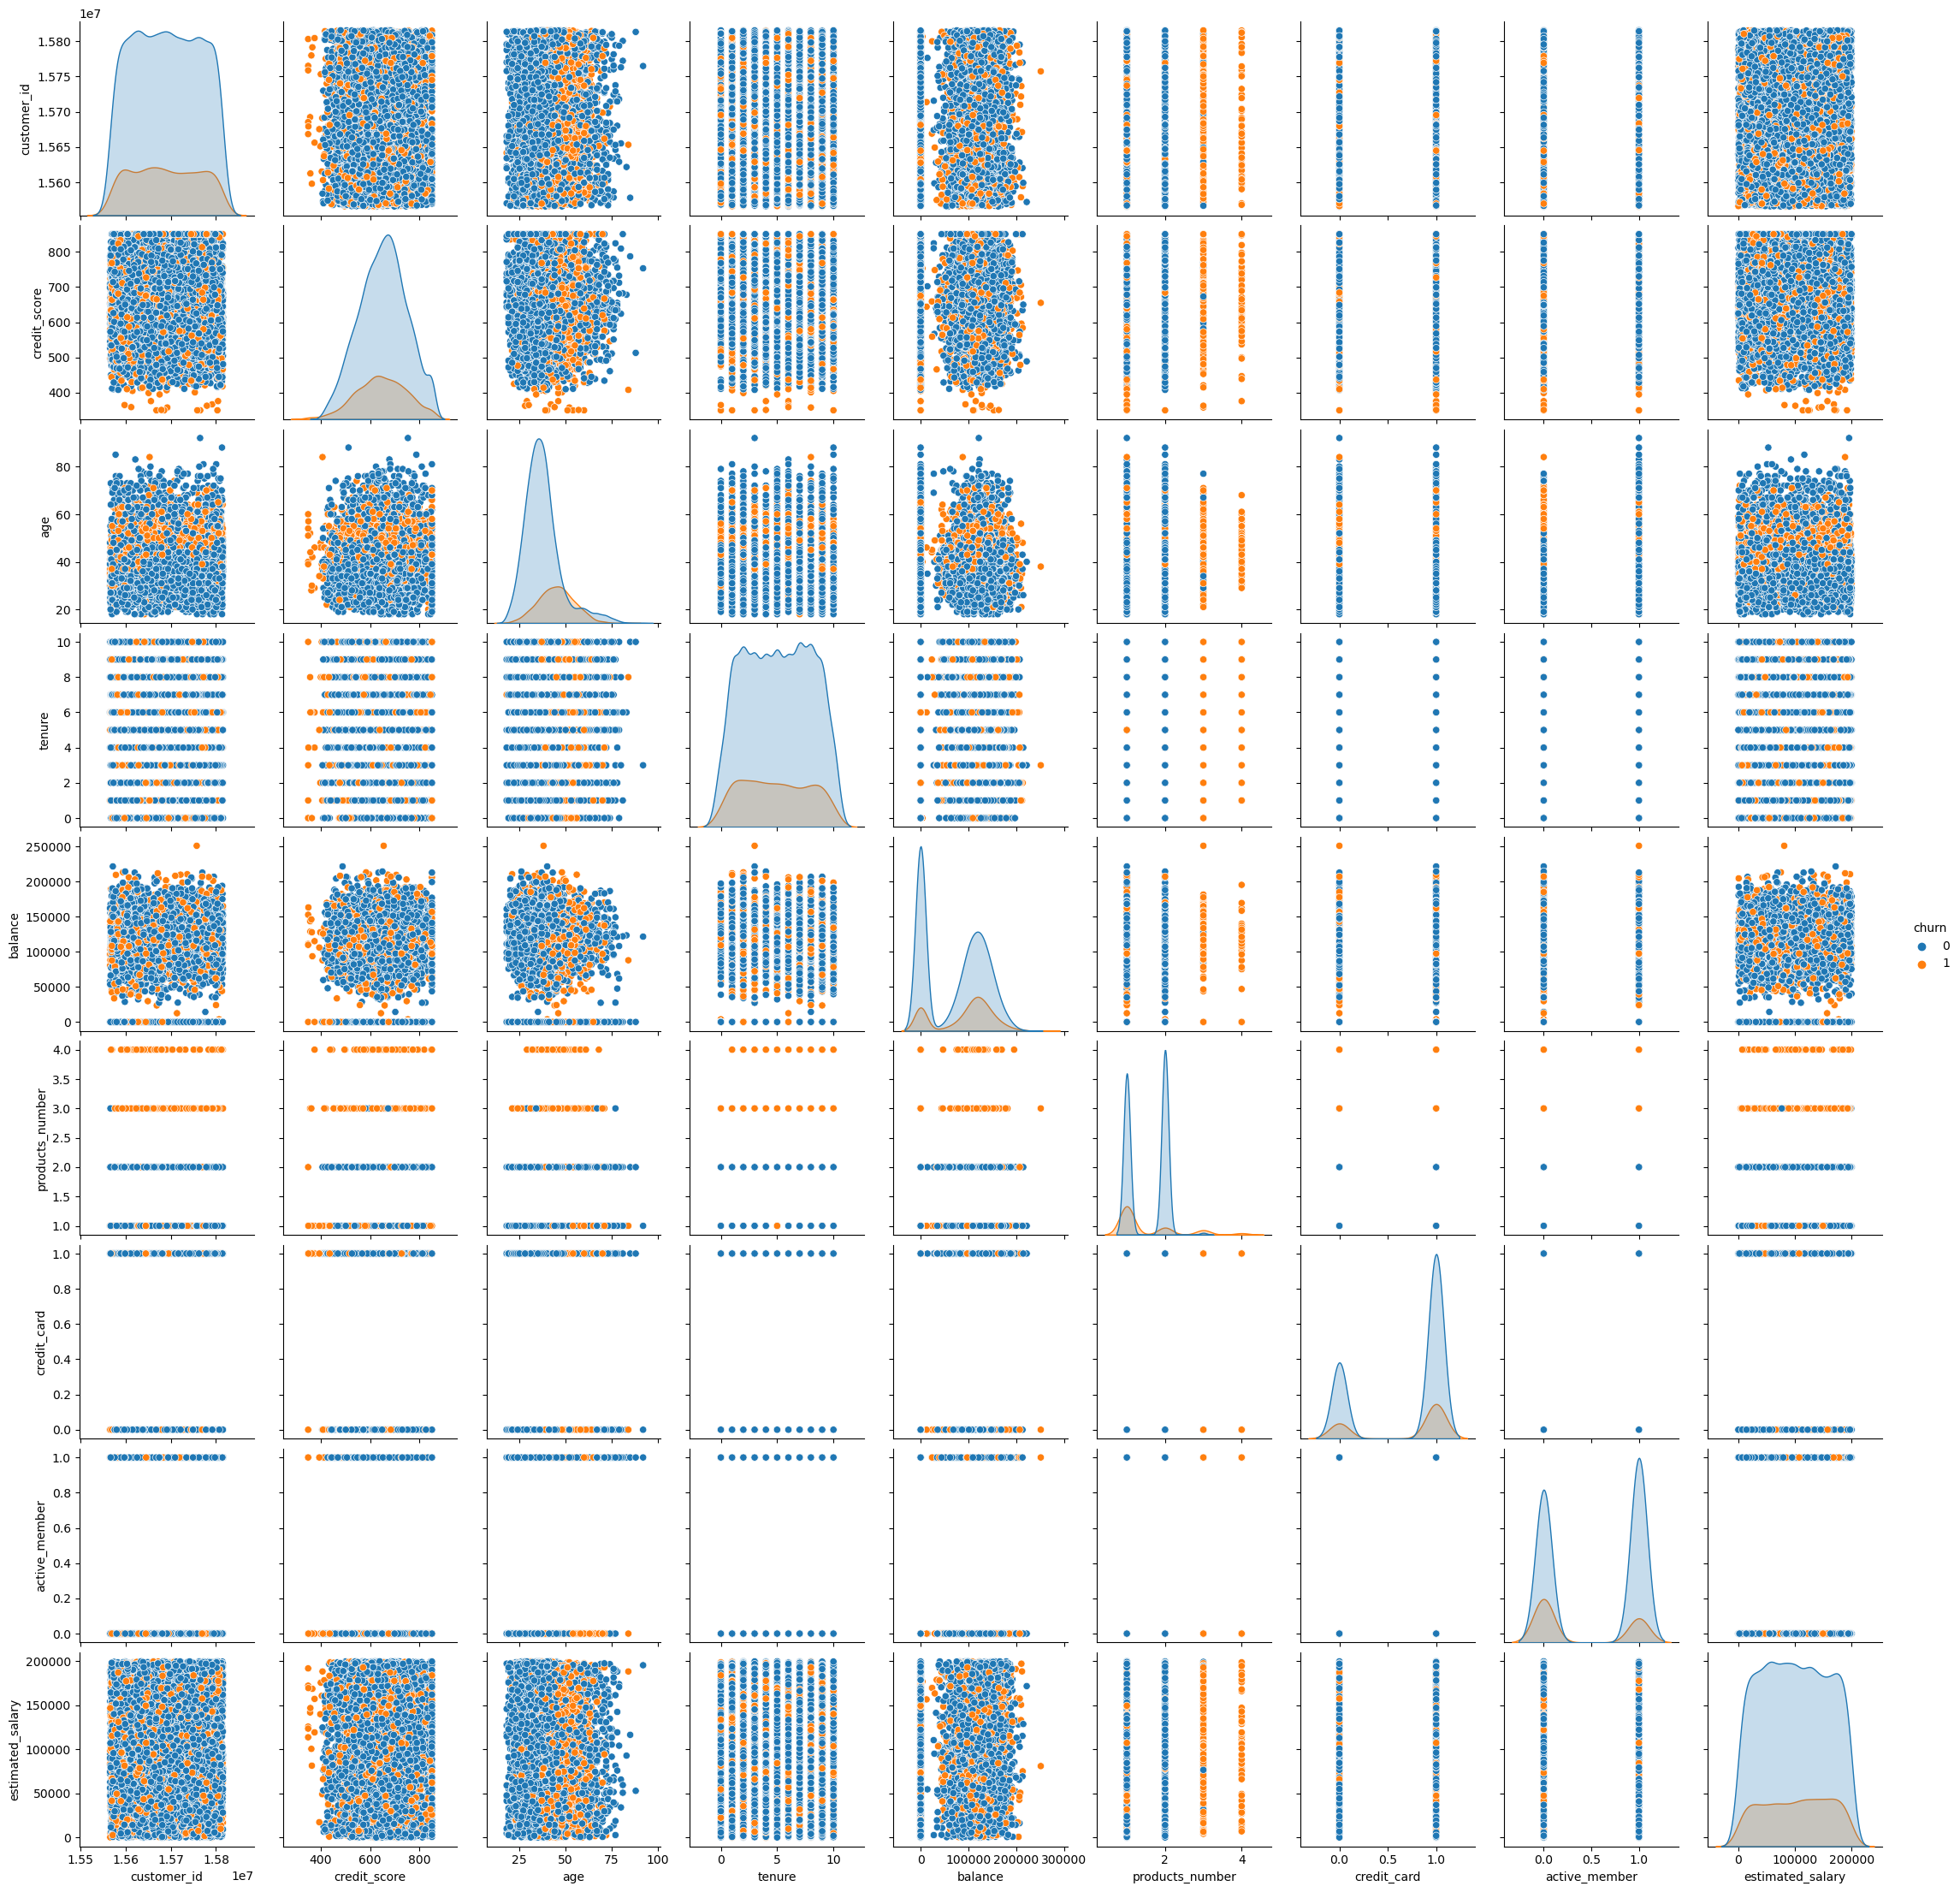

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing features and predictions
sns.pairplot(data, hue='churn')
plt.show()

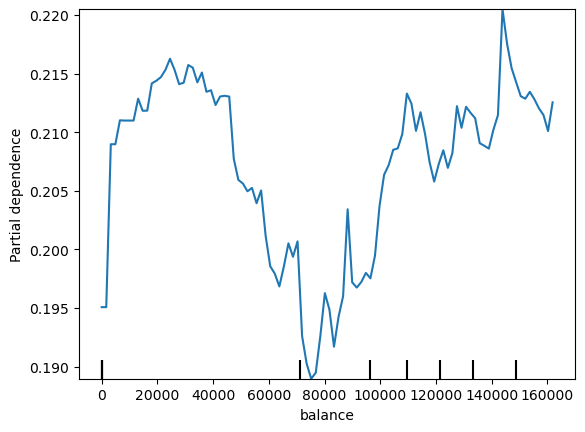

In [51]:
from sklearn.inspection import PartialDependenceDisplay

dis = PartialDependenceDisplay.from_estimator(best_model, X_train, features=[])